### Assignment: Detecting the Widest Mouth Open Frame in a Video

**Objective:**  
Detecting facial expressions and specific mouth movements, such as the widest opening, is a fundamental technique in computer vision and human-computer interaction. The mouth's movement is highly expressive, and analyzing it has become important in areas like emotion recognition, where open mouth gestures can signal surprise, joy, or vocal sounds.  In this assignment, please design a Python script that analyzes a video of a person talking. Your task is to output the frame where the person's mouth is open the widest.

**Requirements:**

1. **Input:**  
   - Your script should accept a video file (e.g., `.mp4`) containing a person speaking.

2. **Output:**  
   - Display the frame where the mouth is open the widest.
   - Show the index of this frame within the video.

3. **Additional Guidance:**  
   - Use the face detection algorithm to analyze each frame of the video and measure the openness of the mouth in each frame.

In [2]:
import cv2
import face_alignment
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Video

In [3]:
Video('test_video1.mp4')

In [4]:
video_path = 'test_video1.mp4'
capture = cv2.VideoCapture(video_path)

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, flip_input=False)

frames = []

while capture.isOpened():
    ret, frame = capture.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame.astype("uint8"), cv2.COLOR_BGR2RGB)
    frames.append(frame)

capture.release()
cv2.destroyAllWindows()

print(f'Total frames extracted: {len(frames)}')

Total frames extracted: 502


In [5]:
frames_array = np.array(frames)
frames_array.shape

(502, 848, 480, 3)

In [6]:
def get_mouth_openness(landmarks):
    """
    Calculates the openness of the mouth based on landmark points.
    """
    upper_point = landmarks[51]
    lower_point = landmarks[57] # Use upper and lower not right and left

    # Calculate Euclidean distance
    distance = np.linalg.norm(upper_point - lower_point)
    
    return distance

In [7]:
max_openness = 0
widest_frame_idx = -1
widest_frame_img = None

for i, frame in enumerate(frames):
    preds = fa.get_landmarks(frame)

    if preds:
        landmarks = preds[0]
        current_openness = get_mouth_openness(landmarks)
        
        if current_openness > max_openness:
            max_openness = current_openness
            widest_frame_idx = i
            widest_frame_img = frame

print(f"Max openness score: {max_openness:.2f}")

Max openness score: 151.40


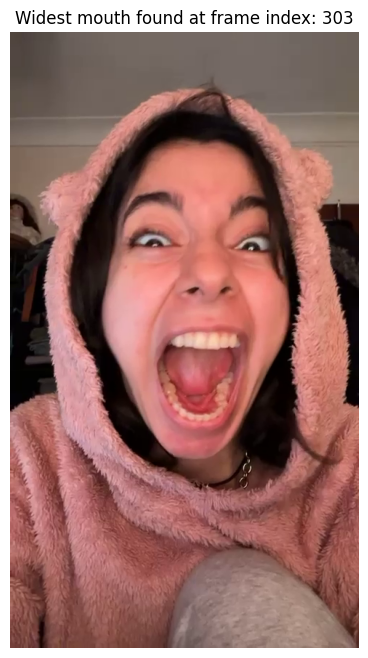

In [8]:
plt.figure(figsize=(10, 8))
plt.imshow(widest_frame_img)
plt.title(f"Widest mouth found at frame index: {widest_frame_idx}")
plt.axis("off")
plt.show()

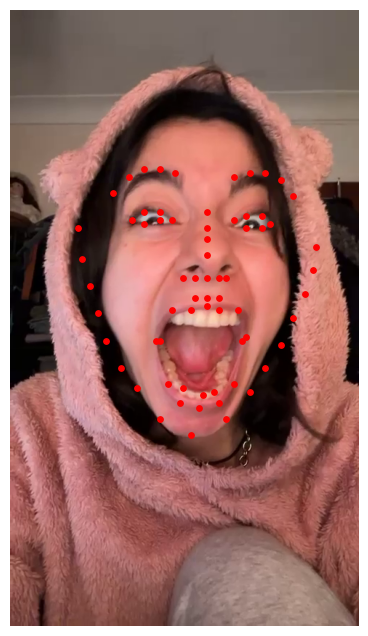

In [9]:
fa_3d = face_alignment.FaceAlignment(face_alignment.LandmarksType.THREE_D, flip_input=False)
preds_3d = fa_3d.get_landmarks(widest_frame_img)[0]

plt.figure(figsize=(10, 8))
plt.imshow(widest_frame_img)
plt.scatter(preds_3d[:, 0], preds_3d[:, 1], c="r", s=15)
plt.axis("off")
plt.show()

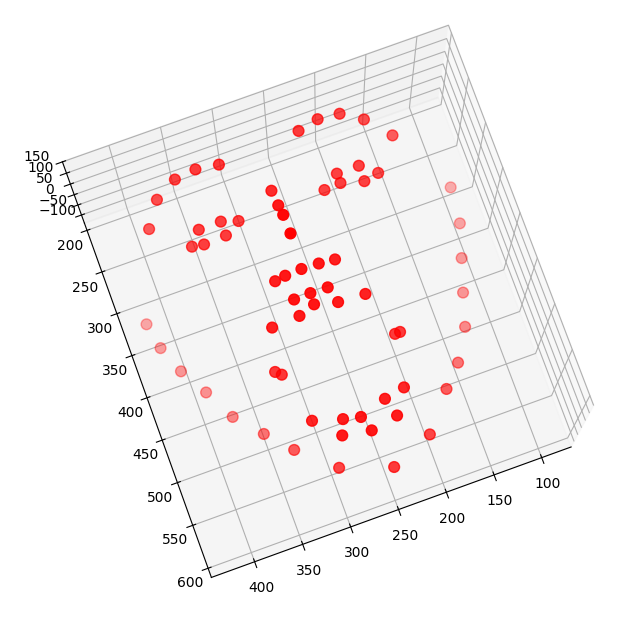

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")
ax.scatter3D(preds_3d[:, 0], preds_3d[:, 1], preds_3d[:, 2], c="r", s=60)
ax.view_init(elev=80, azim=70)
plt.show()